In [23]:
!wget -O sign_mnist_train.csv "https://drive.google.com/uc?export=download&id=1tuxtTQO2hKGIbWJn_zJVAk8RraDOR1GR"
!wget -O household_power_consumption.txt "https://drive.google.com/uc?export=download&id=1R5JGn_TED4HpRMyQwMCU85LMhyM-9G-4"
!wget -O amer_sign2.png "https://drive.google.com/uc?export=download&id=12mV5Ri4wXNWH6wBT9vOEHU-QHIEg2KsG"
!wget -O amer_sign3.png "https://drive.google.com/uc?export=download&id=1p1cavE37zESMEb-ITy4Rqe2l33aS-33h"
!wget -O american_sign_language.PNG "https://drive.google.com/uc?export=download&id=1VmPt8JCJyr6SxkateEvAemnehDDTTqxV"

--2024-11-23 16:54:41--  https://drive.google.com/uc?export=download&id=1tuxtTQO2hKGIbWJn_zJVAk8RraDOR1GR
Resolving drive.google.com (drive.google.com)... 173.194.215.138, 173.194.215.101, 173.194.215.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tuxtTQO2hKGIbWJn_zJVAk8RraDOR1GR&export=download [following]
--2024-11-23 16:54:41--  https://drive.usercontent.google.com/download?id=1tuxtTQO2hKGIbWJn_zJVAk8RraDOR1GR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83281065 (79M) [application/octet-stream]
Saving to: ‘sign_mnist_train.csv’

sign_mnist_train.cs 100%[===================>]  79.42M

#Imports

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import warnings
warnings.filterwarnings('ignore')

#Question 1 CNN Model


##Model Training

In [3]:
# Load and preprocess the dataset
def preprocess_data(file_path):
    data = pd.read_csv(file_path)

    # Extract labels and pixel data
    labels = data['label'].values
    images = data.drop(columns=['label']).values

    # Normalize the pixel values
    images = images / 255.0

    images = images.reshape(-1, 28, 28, 1)

    return images, labels

# Split the data into train and test sets
def split_data(images, labels, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

# Build the CNN model
def build_model(input_shape):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.28))

    # Output Layer
    model.add(layers.Dense(26, activation='softmax'))

    return model

# Compile and train the model
def train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    return history

In [4]:
dataset_path = 'sign_mnist_train.csv'
images, labels = preprocess_data(dataset_path)
X_train, X_test, y_train, y_test = split_data(images, labels)

input_shape = (28, 28, 1)
model = build_model(input_shape)
history = train_model(model, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.3309 - loss: 2.2477 - val_accuracy: 0.9175 - val_loss: 0.3203
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8563 - loss: 0.4346 - val_accuracy: 0.9749 - val_loss: 0.0992
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9434 - loss: 0.1747 - val_accuracy: 0.9951 - val_loss: 0.0315
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9683 - loss: 0.0998 - val_accuracy: 0.9993 - val_loss: 0.0131
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9780 - loss: 0.0704 - val_accuracy: 0.9995 - val_loss: 0.0076
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9810 - loss: 0.0570 - val_accuracy: 0.9995 - val_loss: 0.0062
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9996 - val_loss: 0.0054
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9869 - loss: 0.0397 - 

##Model Visualisation

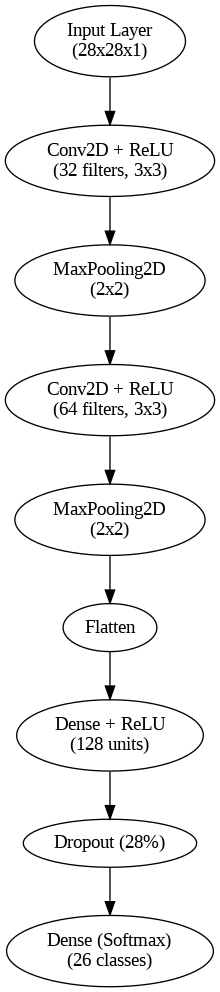

In [5]:
#Data Flow Visualisation
# Initialize a directed graph
dot = Digraph()

# Input layer
dot.node('Input', 'Input Layer\n(28x28x1)')

# First convolutional layer and pooling
dot.node('Conv1', 'Conv2D + ReLU\n(32 filters, 3x3)')
dot.node('Pool1', 'MaxPooling2D\n(2x2)')

# Second convolutional layer and pooling
dot.node('Conv2', 'Conv2D + ReLU\n(64 filters, 3x3)')
dot.node('Pool2', 'MaxPooling2D\n(2x2)')

# Flatten and dense layers
dot.node('Flatten', 'Flatten')
dot.node('Dense1', 'Dense + ReLU\n(128 units)')
dot.node('Dropout', 'Dropout (28%)')
dot.node('Output', 'Dense (Softmax)\n(26 classes)')

# Define the edges between the layers
dot.edges([
    ('Input', 'Conv1'),
    ('Conv1', 'Pool1'),
    ('Pool1', 'Conv2'),
    ('Conv2', 'Pool2'),
    ('Pool2', 'Flatten'),
    ('Flatten', 'Dense1'),
    ('Dense1', 'Dropout'),
    ('Dropout', 'Output')
])

# Render the graph and display it
dot.render('cnn_model_visualization', format='png', cleanup=True)
Image('cnn_model_visualization.png')


##Model Metrics

The accuracy of the model is: 
[0.9175013899803162, 0.9748679399490356, 0.9950828552246094, 0.9992715120315552, 0.9994536638259888, 0.9994536638259888, 0.9996357560157776, 1.0, 0.9990894198417664, 0.9998179078102112, 0.9992715120315552, 0.9994536638259888, 0.998725175857544, 1.0, 1.0, 1.0, 1.0, 0.9996357560157776, 0.9998179078102112, 1.0]

The loss of the model is: 
[0.32033467292785645, 0.09916195273399353, 0.03154761716723442, 0.013073897920548916, 0.007629243656992912, 0.00617538345977664, 0.005420384928584099, 0.002571224234998226, 0.0033136189449578524, 0.0017858179053291678, 0.0028173562604933977, 0.003677084343507886, 0.0032186757307499647, 0.0002327995898667723, 0.00025229653692804277, 0.00015345383144449443, 0.00019518082262948155, 0.0009999941103160381, 0.0006139850011095405, 0.00025043138884939253]


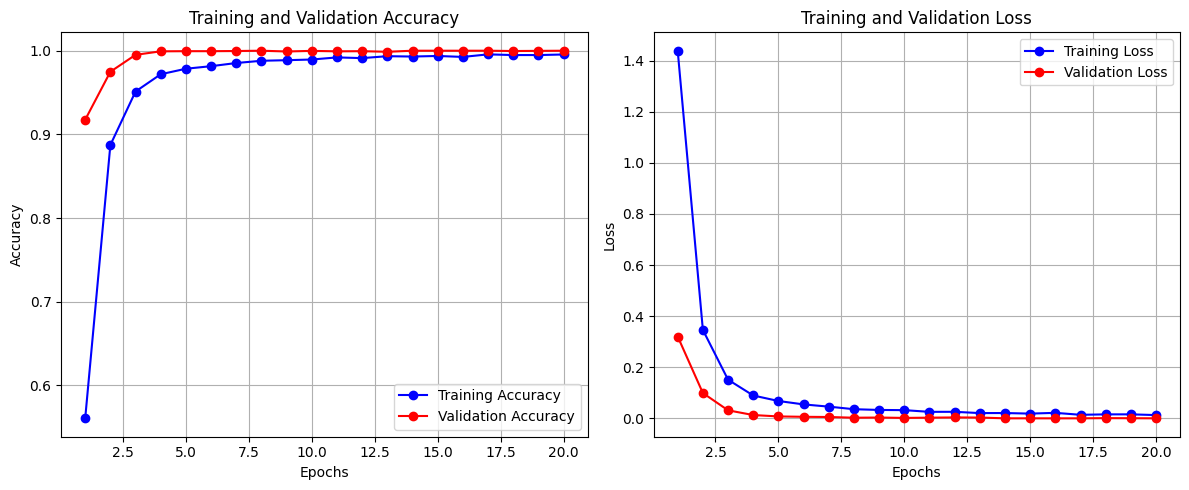

In [6]:
def plot_history(history):
    # Extract training and validation metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print('The accuracy of the model is: ')
    print(val_acc)
    print('\nThe loss of the model is: ')
    print(val_loss)
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-o', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the training process
plot_history(history)

#print(val_acc)
#print(val_loss)

#Question 2 LSTM

##Dataset Loading, Cleaning and Visualisation

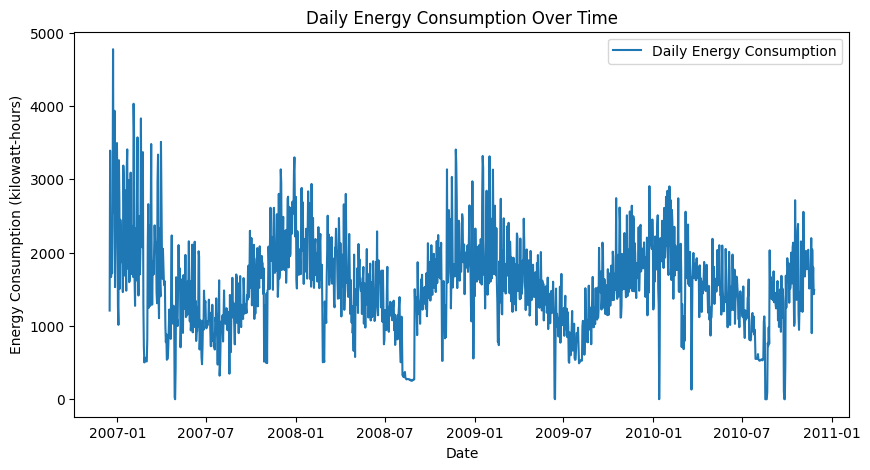

In [24]:
data_path = 'household_power_consumption.txt'
columns = ["Date", "Time", "Global_active_power", "Global_reactive_power", "Voltage",
           "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

raw_data = pd.read_csv(data_path, sep=';', header=0, low_memory=False, names=columns, na_values='?')

raw_data['Datetime'] = pd.to_datetime(raw_data['Date'] + ' ' + raw_data['Time'], dayfirst=True, format='%d/%m/%Y %H:%M:%S')
raw_data.drop(['Date', 'Time'], axis=1, inplace=True)
raw_data.dropna(inplace=True)
raw_data['Global_active_power'] = pd.to_numeric(raw_data['Global_active_power'])
raw_data.set_index('Datetime', inplace=True)
daily_data = raw_data['Global_active_power'].resample('D').sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Daily Energy Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kilowatt-hours)')
plt.legend()
plt.show()

##Loading Sequences and Data into LSTM

Create sequences to load into LSTM

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(daily_data.values.reshape(-1, 1))

look_back = 30  # Use the past 30 days
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Load data into LSTM

In [26]:
model = Sequential([
    Input(shape=(look_back, 1)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse',metrics=['mape'])

model.summary()

epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0659 - mape: 242100.3594 - val_loss: 0.0082 - val_mape: 4727671.0000
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0110 - mape: 1668902.6250 - val_loss: 0.0080 - val_mape: 4945228.0000
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0106 - mape: 371630.5312 - val_loss: 0.0079 - val_mape: 4683468.5000
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0109 - mape: 1097982.3750 - val_loss: 0.0080 - val_mape: 4620807.5000
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0103 - mape: 951126.2500 - val_loss: 0.0076 - val_mape: 4205898.0000
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0106 - mape: 679590.6250 - val_loss: 0.0077 - val_mape: 4345806.0000
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0109 - mape: 875275.1250 - val_loss: 0.0077 - val_mape: 4314517.0000
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0102 - mape: 1228865.7500 -

##Model Evaluation

We can now evaluate the model.

In [27]:
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Mean Absolute Error (MAE): 294.80040842914923
Root Mean Squared Error (RMSE): 400.39650220185007


Plot of Forecasted Values vs Actual Values

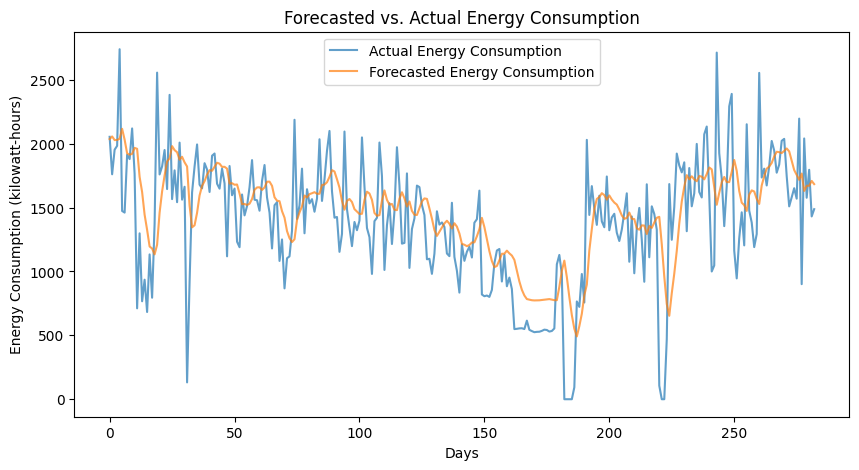

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual Energy Consumption', alpha=0.7)
plt.plot(y_pred_inv, label='Forecasted Energy Consumption', alpha=0.7)
plt.title('Forecasted vs. Actual Energy Consumption')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kilowatt-hours)')
plt.legend()
plt.show()

Visualising Training Loss

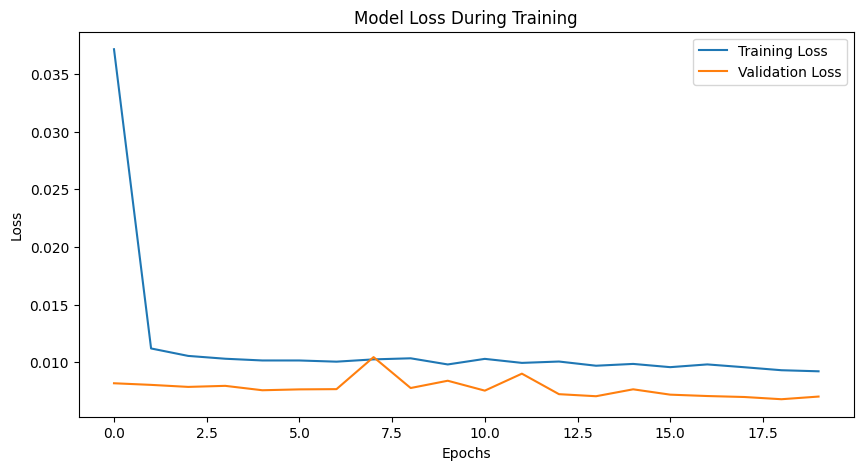

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()